In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [4]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


In [5]:
train['facts']

0       On June 27, 1962, Phil St. Amant, a candidate ...
1       Ramon Nelson was riding his bike when he suffe...
2       An Alabama state court convicted Billy Joe Mag...
3       Victor Linkletter was convicted in state court...
4       On April 24, 1953 in Selma, Alabama, an intrud...
                              ...                        
2473    Congress amended the Clean Air Act through the...
2474    Alliance Bond Fund, Inc., an investment fund, ...
2475    In 1992, the District Court sentenced Manuel D...
2476    On March 8, 1996, Enrico St. Cyr, a lawful per...
2477    Herbert Markman owns the patent to a system th...
Name: facts, Length: 2478, dtype: object

In [ ]:
# 대문자 변환, 기타문자 제거

In [6]:
print('전체 학습데이터 개수 : {}'.format(len(train)))

전체 학습데이터 개수 : 2478


In [8]:
import matplotlib.pyplot as plt

In [15]:
import matplotlib

In [16]:
print(matplotlib.__version__)

3.5.3


Text(0, 0.5, 'Number of review')

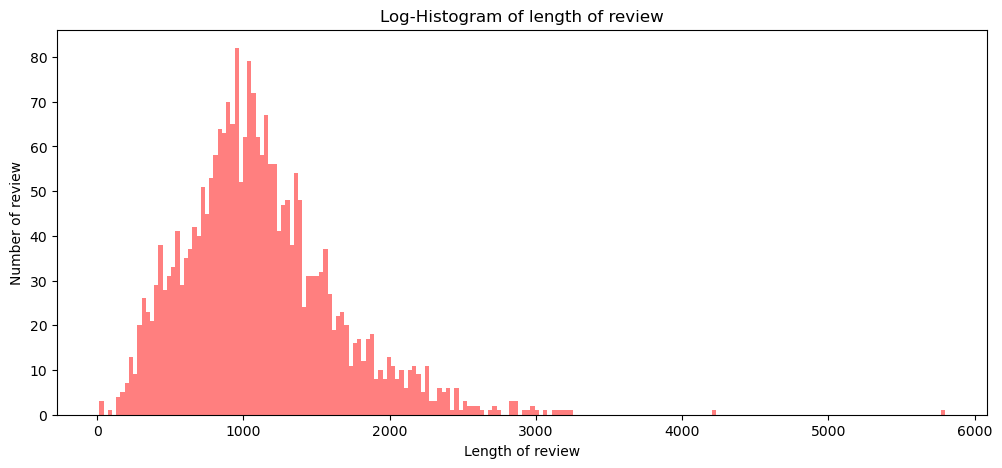

In [17]:
train_length = train['facts'].apply(len)
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=.5, color='r', label='word')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [18]:
print('길이 최대 값: {}'.format(np.max(train_length)))
print('길이 최소 값: {}'.format(np.min(train_length)))
print('길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('길이 중간 값: {}'.format(np.median(train_length)))
print('길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

길이 최대 값: 5795
길이 최소 값: 15
길이 평균 값: 1109.06
길이 표준편차: 515.41
길이 중간 값: 1048.0
길이 제 1 사분위: 771.25
길이 제 3 사분위: 1373.75


(-0.5, 799.5, 599.5, -0.5)

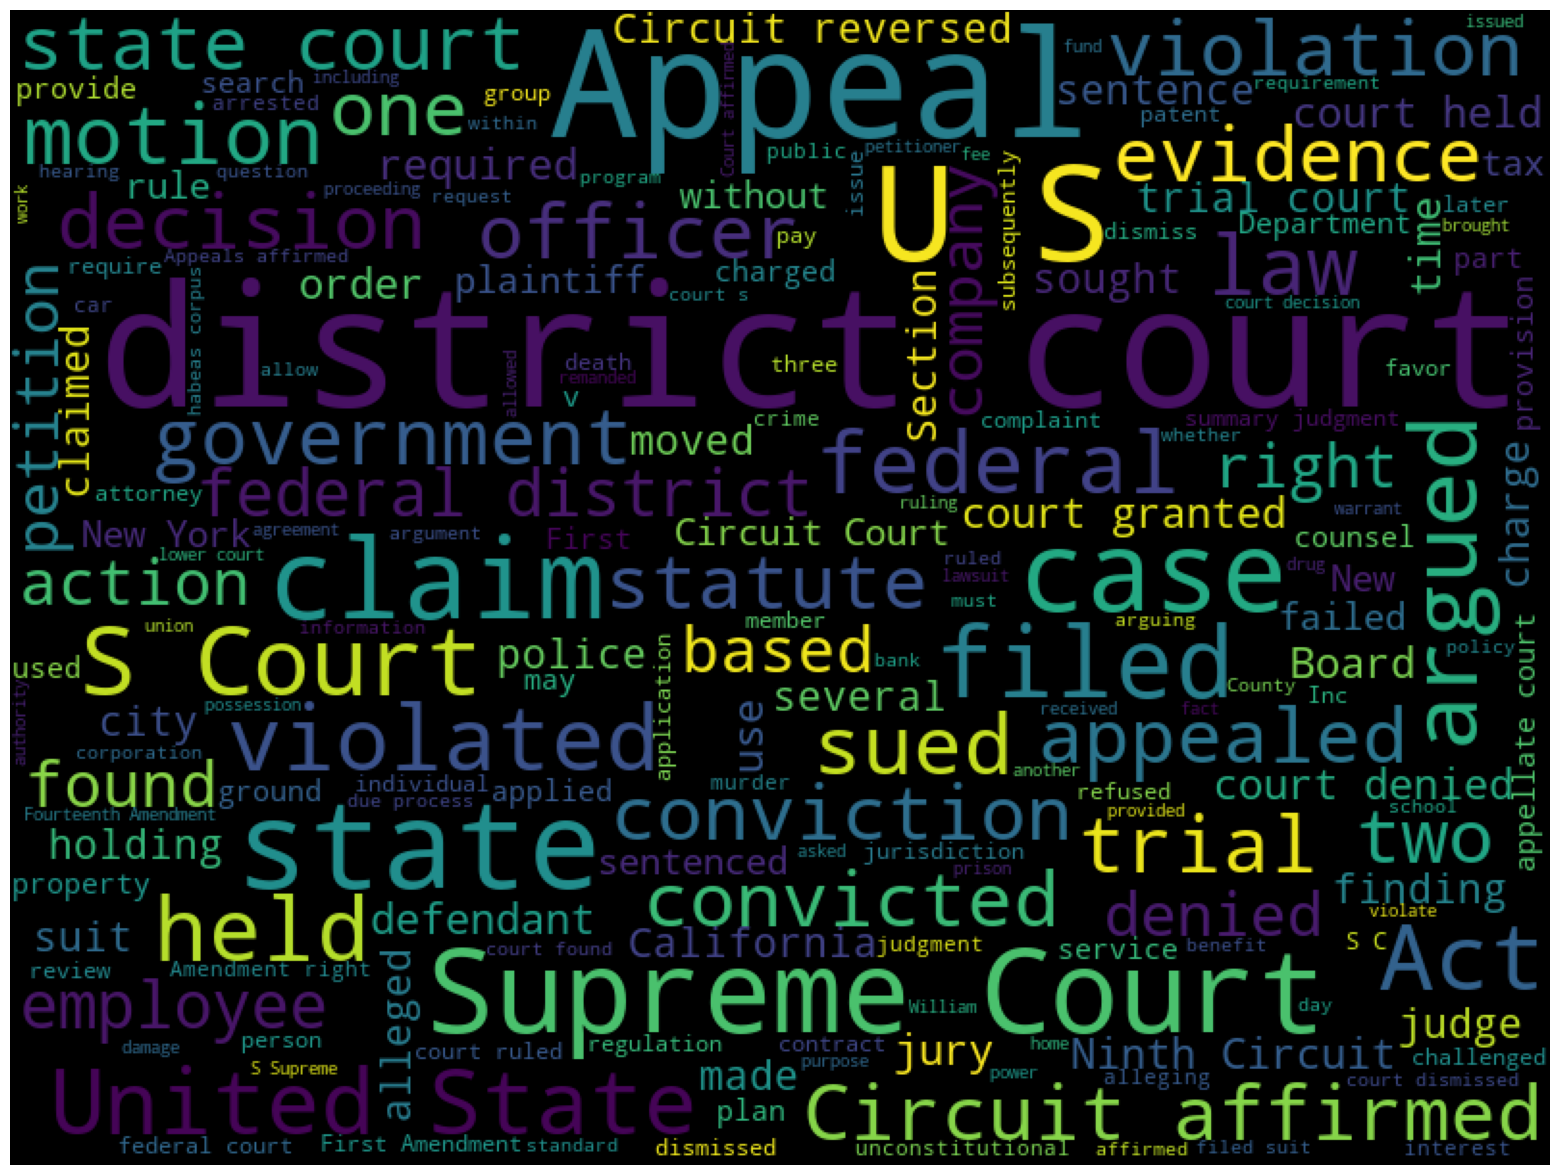

In [19]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train['facts']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')


In [21]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

def preprocessing(sentence, remove_stopwords = False):
    #영어가 아닌 특수문자를 공백으로 바꾸기
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    # 대문자들을 소문자로 바꾸고, 공백단위로 텍스트 나눔
    words = sentence.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_sentence = ' '.join(words)
    else:
        clean_sentence = ' '.join(words)
    return clean_sentence

clean_train = []
for sent in train['facts']:
    clean_train.append(preprocessing(sent, remove_stopwords=True))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
clean_train_df = pd.DataFrame({'first_party':train['first_party'], 'second_party':train['second_party'], 'facts':clean_train, 'first_party_winner' : train['first_party_winner']})

In [32]:
clean_train_df #텍스트 정제 완료

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,june phil st amant candidate public office mad...,1
1,Stephen Duncan,Lawrence Owens,ramon nelson riding bike suffered lethal blow ...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",alabama state court convicted billy joe magwoo...,1
3,Linkletter,Walker,victor linkletter convicted state court eviden...,0
4,William Earl Fikes,Alabama,april selma alabama intruder broke apartment d...,1
...,...,...,...,...
2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",congress amended clean air act energy policy a...,1
2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",alliance bond fund inc investment fund purchas...,1
2475,Peguero,United States,district court sentenced manuel peguero months...,0
2476,Immigration and Naturalization Service,St. Cyr,march enrico st cyr lawful permanent resident ...,0


In [33]:
# https://velog.io/@dayday/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%EA%B0%9C%EC%9A%94-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%B6%84%EB%A5%98

In [43]:
# 패딩
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [44]:
#tokenizer 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train)
text_sequences = tokenizer.texts_to_sequences(clean_train)

# 단어 사전
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

# 최대 길이는 중간값 기준
MAX_SEQUENCE_LENGTH = 1048

train_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (2478, 1048)


In [45]:
train_inputs

array([[  720,  9015,  1000, ...,     0,     0,     0],
       [ 7498,  1540,  4081, ...,     0,     0,     0],
       [  213,     3,     1, ...,     0,     0,     0],
       ...,
       [    2,     1,    94, ...,     0,     0,     0],
       [  693, 16581,  1000, ...,     0,     0,     0],
       [ 5162,  9013,  2239, ...,     0,     0,     0]])

In [46]:
# 테스트 데이터 셋에도 동일하게 적용
clean_test = []
for sent in test['facts']:
    clean_test.append(preprocessing(sent, remove_stopwords=True))
    
clean_test_df = pd.DataFrame({'first_party':test['first_party'], 'second_party':test['second_party'], 'facts':clean_test})
